In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Imports successful")

✅ Imports successful


In [2]:
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
california = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = california.frame  # This includes features + target together

print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Shape: (20640, 9)

First few rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
print("Data Info:")
print(df.info())

print("\n" + "="*50)
print("Missing Values:")
print(df.isnull().sum())

print("\n" + "="*50)
print("Statistical Summary:")
print(df.describe())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       

Price Statistics:
count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


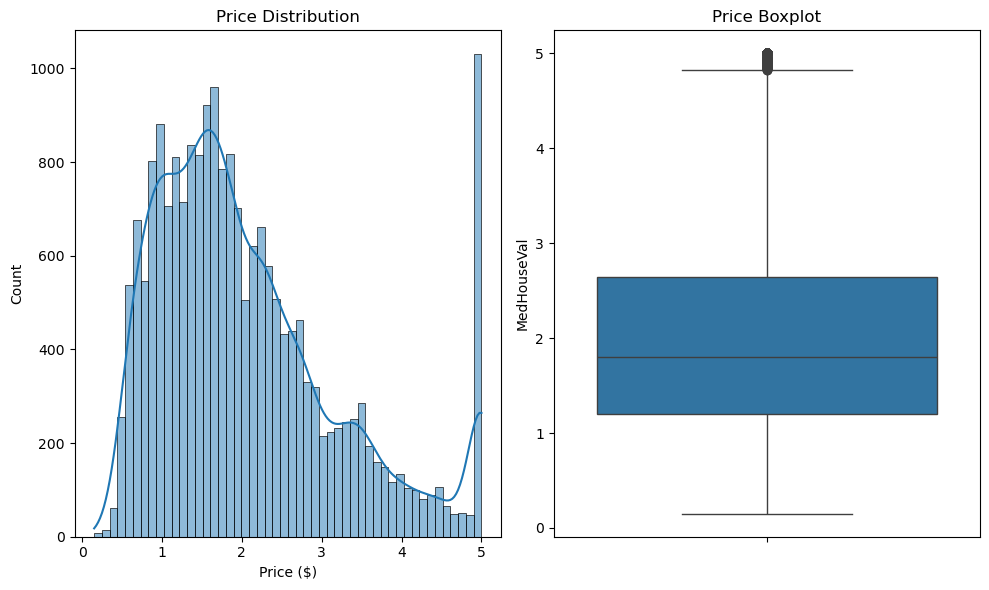

✅ Visualization saved


In [4]:
target_column = 'MedHouseVal'

print(f"Price Statistics:")
print(df[target_column].describe())

# Visualize distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[target_column], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df[target_column])
plt.title('Price Boxplot')

plt.tight_layout()
plt.savefig('../visuals/price_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")

In [5]:
# Examine all columns
print("All columns:")
print(df.columns.tolist())

print("\n" + "="*50)
print("Feature descriptions:")
print("\nMedInc: Median income in block (in $10,000s)")
print("HouseAge: Median age of houses in block")
print("AveRooms: Average number of rooms per household")
print("AveBedrms: Average number of bedrooms per household")
print("Population: Block population")
print("AveOccup: Average occupancy per household")
print("Latitude: Block latitude")
print("Longitude: Block longitude")
print("MedHouseVal: Median house value (TARGET - in $100,000s)")


All columns:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Feature descriptions:

MedInc: Median income in block (in $10,000s)
HouseAge: Median age of houses in block
AveRooms: Average number of rooms per household
AveBedrms: Average number of bedrooms per household
Population: Block population
AveOccup: Average occupancy per household
Latitude: Block latitude
Longitude: Block longitude
MedHouseVal: Median house value (TARGET - in $100,000s)


In [6]:
# Separate features (X) from target (y)
X = df.drop('MedHouseVal', axis=1)  # All columns except target
y = df['MedHouseVal']  # Target only

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

print("\n" + "="*50)
print("Features (X) - first 3 rows:")
print(X.head(3))

print("\n" + "="*50)
print("Target (y) - first 10 values:")
print(y.head(10))


Features shape: (20640, 8)
Target shape: (20640,)

Features (X) - first 3 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  

Target (y) - first 10 values:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
Name: MedHouseVal, dtype: float64


In [7]:
# Check for missing values in features and target
print("Missing values in features:")
print(X.isnull().sum())

print("\n" + "="*50)
print("Missing values in target:")
print(y.isnull().sum())


Missing values in features:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing values in target:
0


**The Problem:**

- If you train on ALL data, you can't test if the model works on NEW data
- Model might just memorize training examples (overfitting)

**The Solution:**

- Split data: 80% training, 20% testing
- Train model on 80%
- Test on the 20% it's never seen
- If it works on unseen data → model learned real patterns, not memorization

**Mental Model:**

Training data = study guide with answers

Test data = real exam (no answers shown during training)

In [8]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    random_state=42  # Makes split reproducible
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print("\n" + "="*50)
print(f"Training features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Test target shape: {y_test.shape}")


Training set: 16512 samples
Test set: 4128 samples

Training features shape: (16512, 8)
Training target shape: (16512,)
Test features shape: (4128, 8)
Test target shape: (4128,)


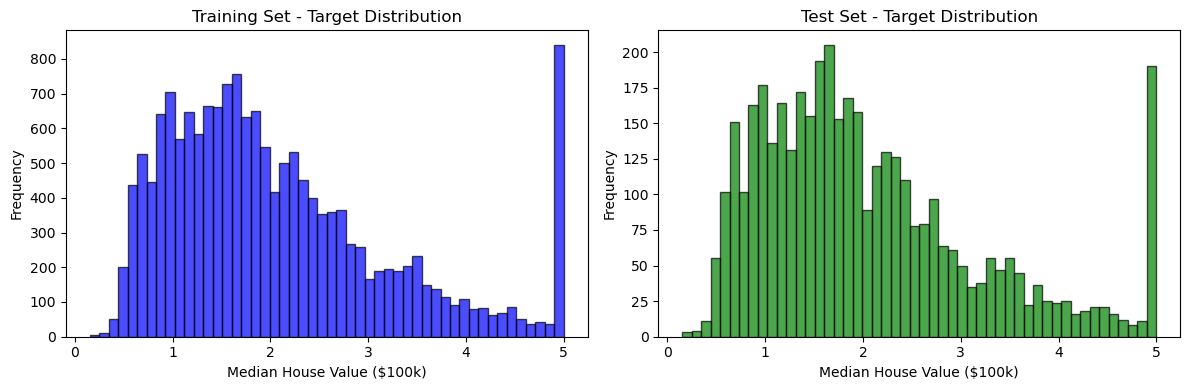

✅ Visualization saved


In [9]:
import matplotlib.pyplot as plt

# Visualize train/test split
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Training data distribution
ax1.hist(y_train, bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('Training Set - Target Distribution')
ax1.set_xlabel('Median House Value ($100k)')
ax1.set_ylabel('Frequency')

# Test data distribution
ax2.hist(y_test, bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_title('Test Set - Target Distribution')
ax2.set_xlabel('Median House Value ($100k)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../visuals/train_test_split.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")


In [10]:
from sklearn.linear_model import LinearRegression

# Create the model (just creates the structure, hasn't learned yet)
model = LinearRegression()

print("Model created (untrained):")
print(model)


Model created (untrained):
LinearRegression()


The model is just an empty structure right now - like a blank brain ready to learn
---

In [11]:
# Train the model (THIS is where learning happens)
model.fit(X_train, y_train)

print("✅ Model trained!")
print("\n" + "="*50)
print("What the model learned:")
print(f"\nIntercept (base price): ${model.intercept_:.2f} (in $100k)")
print(f"In dollars: ${model.intercept_ * 100000:,.0f}")

print("\nCoefficients (how each feature affects price):")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")


✅ Model trained!

What the model learned:

Intercept (base price): $-37.02 (in $100k)
In dollars: $-3,702,328

Coefficients (how each feature affects price):
  MedInc: 0.4487
  HouseAge: 0.0097
  AveRooms: -0.1233
  AveBedrms: 0.7831
  Population: -0.0000
  AveOccup: -0.0035
  Latitude: -0.4198
  Longitude: -0.4337


In [12]:
# Make predictions on test set
y_pred = model.predict(X_test)

print("Predictions made!")
print(f"\nFirst 10 actual values:")
print(y_test.head(10).values)

print(f"\nFirst 10 predictions:")
print(y_pred[:10])

print("\n" + "="*50)
print("Comparison (first 5):")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    diff = abs(actual - predicted)
    print(f"Actual: ${actual:.2f} ($100k) | Predicted: ${predicted:.2f} ($100k) | Diff: ${diff:.2f} ($100k)")


Predictions made!

First 10 actual values:
[0.477   0.458   5.00001 2.186   2.78    1.587   1.982   1.575   3.4
 4.466  ]

First 10 predictions:
[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725 2.01175367
 2.64550005 2.16875532 2.74074644 3.91561473]

Comparison (first 5):
Actual: $0.48 ($100k) | Predicted: $0.72 ($100k) | Diff: $0.24 ($100k)
Actual: $0.46 ($100k) | Predicted: $1.76 ($100k) | Diff: $1.31 ($100k)
Actual: $5.00 ($100k) | Predicted: $2.71 ($100k) | Diff: $2.29 ($100k)
Actual: $2.19 ($100k) | Predicted: $2.84 ($100k) | Diff: $0.65 ($100k)
Actual: $2.78 ($100k) | Predicted: $2.60 ($100k) | Diff: $0.18 ($100k)


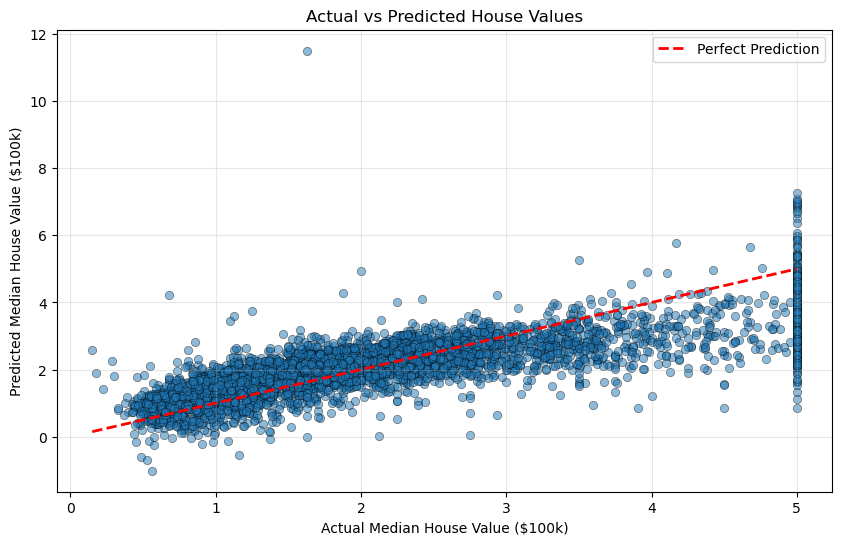

✅ Visualization saved


In [13]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', linewidth=0.5)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Median House Value ($100k)')
plt.ylabel('Predicted Median House Value ($100k)')
plt.title('Actual vs Predicted House Values')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('../visuals/actual_vs_predicted.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization saved")


In [14]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = model.score(X_test, y_test)  # Same as r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print("\nInterpretation:")
print(f"The model explains {r2*100:.2f}% of the variance in house prices")

if r2 > 0.7:
    print("✅ Good model!")
elif r2 > 0.5:
    print("⚠️ Decent model, room for improvement")
else:
    print("❌ Weak model, needs work")


R² Score: 0.5758

Interpretation:
The model explains 57.58% of the variance in house prices
⚠️ Decent model, room for improvement


**R² = how much of price variation the model explains. 1.0 = perfect, 0.0 = useless**

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Error Metrics:")
print(f"\nMean Absolute Error (MAE): ${mae:.4f} ($100k)")
print(f"In dollars: ${mae * 100000:,.0f}")
print("→ On average, predictions are off by this amount")

print(f"\nRoot Mean Squared Error (RMSE): ${rmse:.4f} ($100k)")
print(f"In dollars: ${rmse * 100000:,.0f}")
print("→ Penalizes large errors more than MAE")


Error Metrics:

Mean Absolute Error (MAE): $0.5332 ($100k)
In dollars: $53,320
→ On average, predictions are off by this amount

Root Mean Squared Error (RMSE): $0.7456 ($100k)
In dollars: $74,558
→ Penalizes large errors more than MAE


In [16]:
# Model Performance Summary
print("="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)

print(f"\nDataset: California Housing")
print(f"Training samples: {X_train.shape[0]:,}")
print(f"Test samples: {X_test.shape[0]:,}")
print(f"Features used: {X_train.shape[1]}")

print(f"\nPerformance Metrics:")
print(f"R² Score: {r2:.4f} ({r2*100:.1f}% variance explained)")
print(f"Mean Absolute Error: ${mae * 100000:,.0f}")
print(f"Root Mean Squared Error: ${rmse * 100000:,.0f}")

print(f"\nTop 3 Most Important Features:")
feature_importance = sorted(zip(X_train.columns, abs(model.coef_)),
                            key=lambda x: x[1], reverse=True)
for i, (feature, importance) in enumerate(feature_importance[:3], 1):
    print(f"  {i}. {feature}: {importance:.4f}")


MODEL PERFORMANCE SUMMARY

Dataset: California Housing
Training samples: 16,512
Test samples: 4,128
Features used: 8

Performance Metrics:
R² Score: 0.5758 (57.6% variance explained)
Mean Absolute Error: $53,320
Root Mean Squared Error: $74,558

Top 3 Most Important Features:
  1. AveBedrms: 0.7831
  2. MedInc: 0.4487
  3. Longitude: 0.4337
